# Exploratory Data Analysis

This analysis will help me get familiar with dataset and find the opportunities to do feature engineering

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from EDA import EDA

In [2]:
pd.set_option('display.max_columns', 40)

Pandas cannot handel 6G data while simply reading it.
There are four solutions I can think of:
1. reading only a few columns and analyze at once. However, calculation such as correlation might be a problem in the future even I successfully read in the data.
2. specify each dtype since default dtype takes more memories. However it might have future problem asa point 1.
3. load data in as matrix
4. use spark

Of all the solutioins above, I will try second method first just to test if I can load in the data this way and I am just so familiar analyzing data using pandas, can't give it up so quick without giving it a shot.
However, I think it makes more sense to use spark for following reasons:
1. It can ba a lot faster when doing calculation.
2. The dataset I have only cover 7 days of behavoior data, In the real world setting, I think this type of data is the classic "big data" people are talking all the time. And spark is designed for handling this type of data! 
3. Because the reason in bullet point 2, even I am not dealing with sreaming data, It is better to showcase I have this skillset to the employers.

# Load Data

In [3]:
data_dir = "./data/sampled_data.csv/"

df = pd.DataFrame()
for file in os.listdir(data_dir):    
    if file[-3:] == "csv":
        df = pd.concat((df,pd.read_csv(os.path.join(data_dir,file))),axis=0)

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
spark = SparkSession \
    .builder \
    .appName("EDA") \
    .getOrCreate()

In [4]:
spark.sparkContext.getConf().getAll()

[('spark.driver.port', '33467'),
 ('spark.app.id', 'local-1601171914739'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'EDA'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.host', '192.168.2.162')]

In [5]:
data_dir = "../MLE_Project_Data"
data_file_name = "train_data.csv"
data_path = os.path.join(data_dir,data_file_name)

raw_df = spark.read.load(data_path,format="csv",delimiter="|",header=True)

# Examine Dataset

In [6]:
raw_df_shape = (raw_df.count(),len(raw_df.columns))
print(f"The shape: {raw_df_shape}")

The shape: (41907133, 36)


In [7]:
# head
raw_df_head = [row.asDict() for row in raw_df.head(5)]
pd.DataFrame(raw_df_head)

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,1638254,2112,6869,7,207,17,5,11,13,37,4,21,5,437,5,37,162,4,2,2,28,4,2,2,20,4,4,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,17,1
1,0,1161786,3104,3247,7,183,29,5,17,86,37,4,21,4,370,5,59,141,9,4,2,26,4,3,2,20,4,4,18,-1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,12,17,1
2,0,1814783,5890,4183,7,178,17,5,11,70,39,4,17,5,306,3,81,162,4,2,2,21,2,3,2,20,4,5,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,11,36,1
3,0,1468996,1993,5405,7,207,17,5,21,13,37,4,21,5,275,5,88,180,4,2,2,23,4,2,2,20,7,3,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,11,17,1
4,0,2164010,5439,4677,2,138,24,5,12,33,15,4,15,5,412,3,88,180,4,2,2,20,16,3,2,20,7,3,-1,-1,-1,2,2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^...,11,20,1


In [8]:
# tail
raw_df_tail = [row.asDict() for row in raw_df.tail(5)]
pd.DataFrame(raw_df_tail)

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,0,2154906,5275,5473,7,156,56,5,13,58,37,4,21,6,255,3,87,117,9,2,2,18,14,3,2,28,5,4,18,-1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,13,17,7
1,0,1466996,5952,4158,7,207,17,5,17,13,37,4,21,5,335,3,75,141,4,4,2,38,4,3,2,20,8,5,18,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,17,7
2,0,1930657,2178,1860,2,142,60,5,12,80,41,2,26,5,140,4,29,141,10,2,3,30,-1,-1,1,20,9,3,-1,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,24,7
3,0,1550398,1976,6739,7,154,56,5,11,31,40,4,25,5,275,5,38,162,3,2,2,23,13,3,2,20,4,4,20,1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,11,17,7
4,0,1400807,3869,6751,7,130,30,5,13,28,39,4,17,4,406,5,65,141,4,2,2,21,6,2,2,14,10,2,20,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,36,7


In [9]:
# dtypes
raw_df.schema.fields

[StructField(label,StringType,true),
 StructField(uid,StringType,true),
 StructField(task_id,StringType,true),
 StructField(adv_id,StringType,true),
 StructField(creat_type_cd,StringType,true),
 StructField(adv_prim_id,StringType,true),
 StructField(dev_id,StringType,true),
 StructField(inter_type_cd,StringType,true),
 StructField(slot_id,StringType,true),
 StructField(spread_app_id,StringType,true),
 StructField(tags,StringType,true),
 StructField(app_first_class,StringType,true),
 StructField(app_second_class,StringType,true),
 StructField(age,StringType,true),
 StructField(city,StringType,true),
 StructField(city_rank,StringType,true),
 StructField(device_name,StringType,true),
 StructField(device_size,StringType,true),
 StructField(career,StringType,true),
 StructField(gender,StringType,true),
 StructField(net_type,StringType,true),
 StructField(residence,StringType,true),
 StructField(his_app_size,StringType,true),
 StructField(his_on_shelf_time,StringType,true),
 StructField(app_

In [10]:
raw_df.columns

['label',
 'uid',
 'task_id',
 'adv_id',
 'creat_type_cd',
 'adv_prim_id',
 'dev_id',
 'inter_type_cd',
 'slot_id',
 'spread_app_id',
 'tags',
 'app_first_class',
 'app_second_class',
 'age',
 'city',
 'city_rank',
 'device_name',
 'device_size',
 'career',
 'gender',
 'net_type',
 'residence',
 'his_app_size',
 'his_on_shelf_time',
 'app_score',
 'emui_dev',
 'list_time',
 'device_price',
 'up_life_duration',
 'up_membership_grade',
 'membership_life_duration',
 'consume_purchase',
 'communication_onlinerate',
 'communication_avgonline_30d',
 'indu_name',
 'pt_d']

In [11]:
# describe
describe = raw_df.describe()
describe.toPandas().set_index("summary").T

summary,count,mean,stddev,min,max
label,41907133,0.034492648304048856,0.18249083898022259,0,1
uid,41907133,1618366.5450654665,357389.65521592135,1000001,2237673
task_id,41907133,3436.3739258660335,1429.9486235761321,1001,5992
adv_id,41907133,3963.51341013951,1720.5691813375768,1001,7020
creat_type_cd,41907133,6.490081748135813,1.231181612514361,2,9
adv_prim_id,41907133,159.31912006483478,30.899225966287723,101,214
dev_id,41907133,41.59357343772479,17.41486835377897,11,72
inter_type_cd,41907133,4.646959504483402,0.7103276382288628,2,5
slot_id,41907133,15.254736109005595,3.167097985067854,11,22
spread_app_id,41907133,51.9989373646725,25.10112386162042,11,89


Most of the columns are acutallly categorical variables, doesn't make sense to lokking at those statistics.
However, this summary is a way to confirm whether those categorical columns are really categorical

In [12]:
numeric_columns = ["age","device_size",'his_app_size','app_score','device_price']

In [13]:
# describe
describe = raw_df.select(numeric_columns) \
    .describe()
describe.toPandas().set_index("summary").T

summary,count,mean,stddev,min,max
age,41907133,5.055212772489113,1.4153192617965202,-1,7
device_size,41907133,158.2104430527376,45.07228338655767,101,349
his_app_size,41907133,6.5524609378551375,5.898097528503572,-1,9
app_score,41907133,1.7847627037621494,0.41098686910490795,1,2
device_price,41907133,3.476986387973618,1.1587958240779863,-1,7


Seems like even these are numerical variables but they are already benn grouped by a different bucket levels.
Because there is no further explanation, I need to make a few assumptions:
1. value = -1 equal missing value
2. value of app_score is actual score
3. device price 1-7 means cheap to expensive
4. age 1-7 means young to old

This discovery means when processing data for models, I need to create a lot dummy variables.

# Explore Data

## label distribution

In [14]:
label_count = raw_df.select("label").groupby("label").count().toPandas()

In [15]:
label_count["pct"] = np.round(label_count["count"].values/raw_df_shape[0],decimals=3)
label_count

,label,count,pct
0,0,40461645,0.966
1,1,1445488,0.034


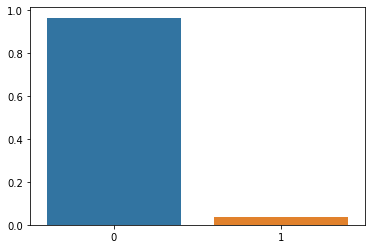

In [16]:
plot = sns.barplot(label_count["label"].values,label_count["count"].values/raw_df_shape[0])

The label distribution is imbalance. But it is expected. This means CTR in this dataset is around 3.5% which is better than the average CTR number I googled.
<img src="images/avg_ctr.png">
The better and alternative way to get the mean CTR is conducting a random sampling to get the esstimation of population mean CTR. But this project is more about demonstrating my skills in develop and deploy the whole system; therefore for faster development, I'll just use the simple mean.

## ID columns

In [17]:
raw_df.columns

['label',
 'uid',
 'task_id',
 'adv_id',
 'creat_type_cd',
 'adv_prim_id',
 'dev_id',
 'inter_type_cd',
 'slot_id',
 'spread_app_id',
 'tags',
 'app_first_class',
 'app_second_class',
 'age',
 'city',
 'city_rank',
 'device_name',
 'device_size',
 'career',
 'gender',
 'net_type',
 'residence',
 'his_app_size',
 'his_on_shelf_time',
 'app_score',
 'emui_dev',
 'list_time',
 'device_price',
 'up_life_duration',
 'up_membership_grade',
 'membership_life_duration',
 'consume_purchase',
 'communication_onlinerate',
 'communication_avgonline_30d',
 'indu_name',
 'pt_d']

In [18]:
id_columns = ['uid','task_id','adv_id','creat_type_cd','adv_prim_id','dev_id','inter_type_cd','slot_id','spread_app_id']

In [19]:
for col in id_columns:
    raw_df.select(F.countDistinct(col)).distinct().show()

+-------------------+
|count(DISTINCT uid)|
+-------------------+
|            1081436|
+-------------------+

+-----------------------+
|count(DISTINCT task_id)|
+-----------------------+
|                   4329|
+-----------------------+

+----------------------+
|count(DISTINCT adv_id)|
+----------------------+
|                  5319|
+----------------------+

+-----------------------------+
|count(DISTINCT creat_type_cd)|
+-----------------------------+
|                            8|
+-----------------------------+

+---------------------------+
|count(DISTINCT adv_prim_id)|
+---------------------------+
|                        101|
+---------------------------+

+----------------------+
|count(DISTINCT dev_id)|
+----------------------+
|                    55|
+----------------------+

+-----------------------------+
|count(DISTINCT inter_type_cd)|
+-----------------------------+
|                            4|
+-----------------------------+

+-----------------------+
|count(

After looking at id columns closely, I discoverd 
1. some features are really ID, some  features are not
2. some id values are actully a feature to another higher level features.

With these two findings I constructed following feature map:

1. users:
    - uid
    - age 
    - city
        - city_rank
        - residence
    - career
    - gender
    - up_life_duration
    - up_membership_grade
    - membership_life_duration
    - consume_purchase
    - communication_onlinerate
    - communication_avgonline_30d
2. ads
    - task_id
    - adv_id
    - creat_type_cd
    - adv_prim_id
    - dev_id
    - inter_typ_cd
    - slot_id
    - indu_name
3. apps
    - spread_app_id
    - tags
    - app_first_class
    - app_second_class
    - his_app_size
    - his_on_shelf_time
    - app_score
4. device
    - device_name
    - device_size
    - emui_dev
    - list_time
    - device_price
6. behavior/event
    - net_type
    - pt_d
   
I will start explore features following this feature map

## Users

users:
- uid
- age 
- city
    - city_rank
    - residence
- career
- gender
- up_life_duration
- up_membership_grade
- membership_life_duration
- consume_purchase
- communication_onlinerate
- communication_avgonline_30d

### uid

In [20]:
# Instantiating EDA object
eda = EDA(target_ctr=0.035)
# cast label into int for calculation
raw_df = raw_df.withColumn("label_int",raw_df["label"].cast("integer"))

CTR distribution by uid
count    1.081436e+06
mean     1.488611e-01
std      1.990887e-01
min      0.000000e+00
25%      1.515152e-02
50%      6.000000e-02
75%      2.000000e-01
max      1.000000e+00
Name: uid_ctr, dtype: float64


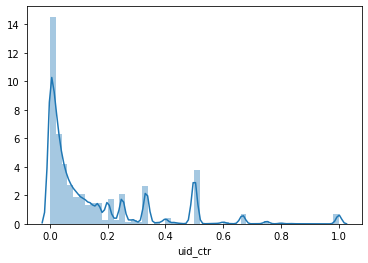

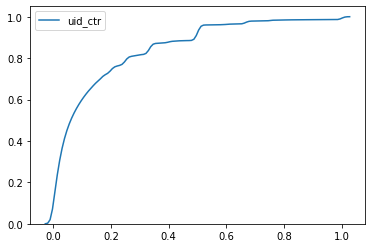

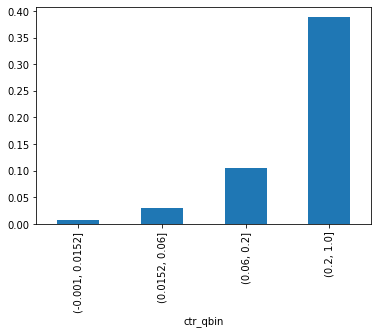

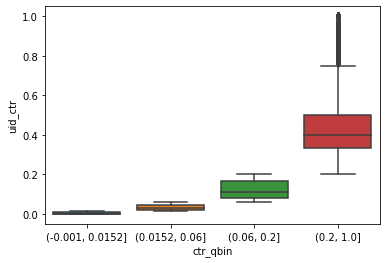

In [21]:
high_ctr_uids, low_ctr_uids = eda.id_analysis(raw_df,"uid")

In [22]:
user_features = ["age",                 
                 #city,
                 "city_rank",
                 "residence",
                 "career",
                 "gender",
                 "up_life_duration",
                 "up_membership_grade",
                 "membership_life_duration",
                 "consume_purchase",
                 #"communication_onlinerate",
                 "communication_avgonline_30d"
                ]

ANALYZE age


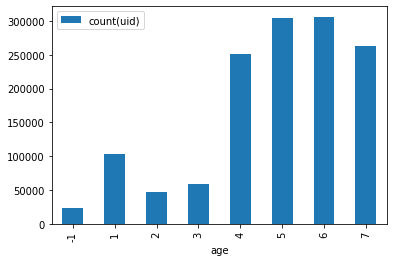

CTR


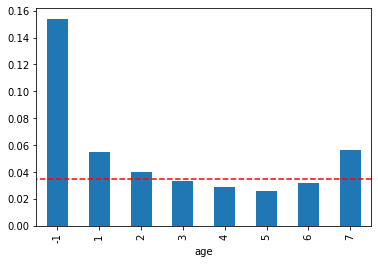

distributions of click or not


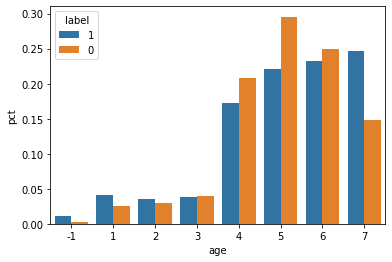



ANALYZE city_rank


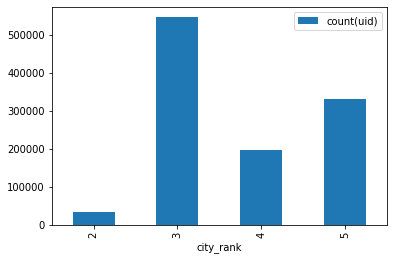

CTR


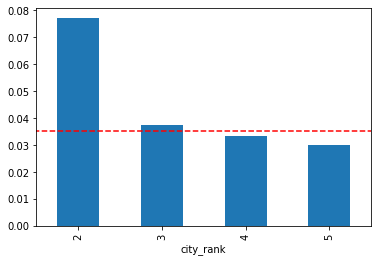

distributions of click or not


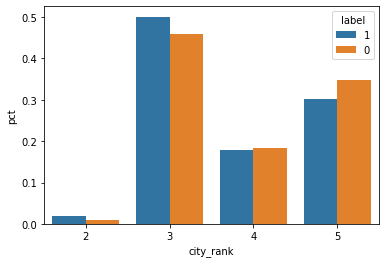



ANALYZE residence


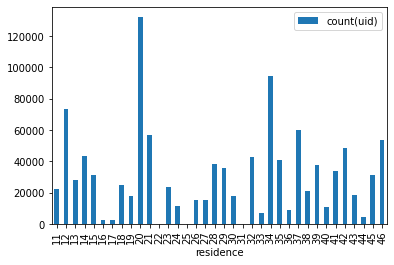

CTR


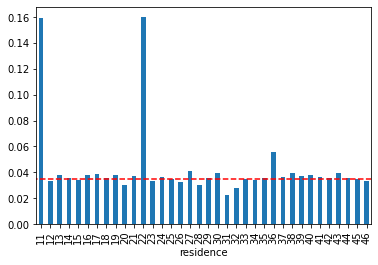

distributions of click or not


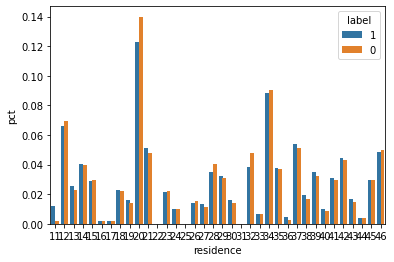



ANALYZE career


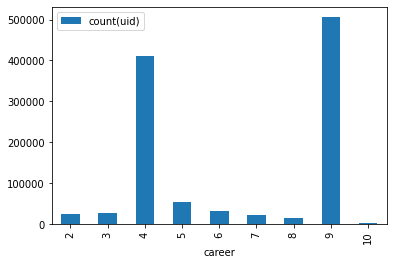

CTR


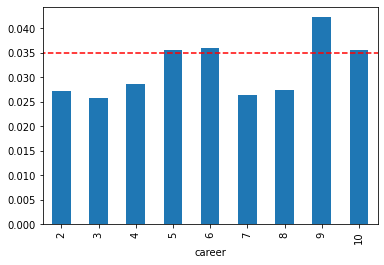

distributions of click or not


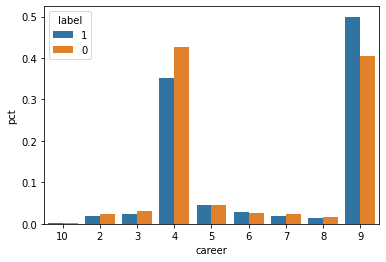



ANALYZE gender


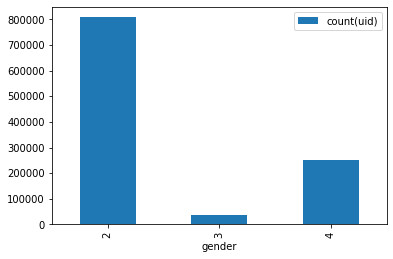

CTR


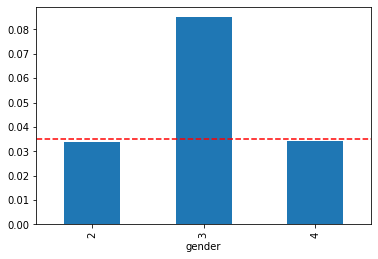

distributions of click or not


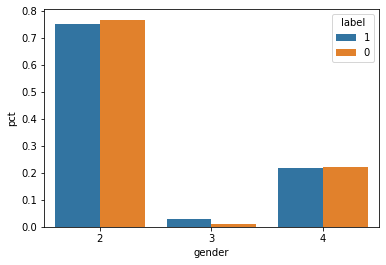



ANALYZE up_life_duration


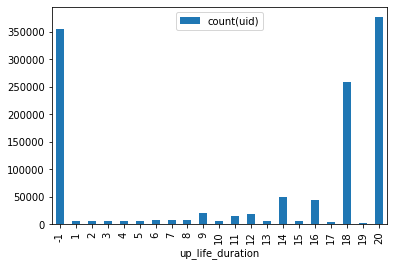

CTR


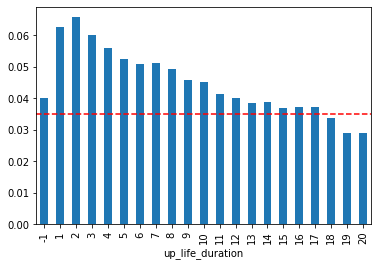

distributions of click or not


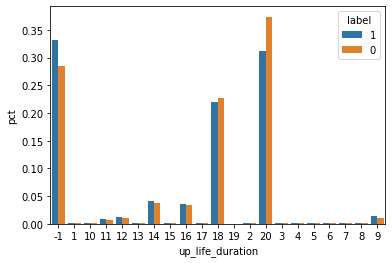



ANALYZE up_membership_grade


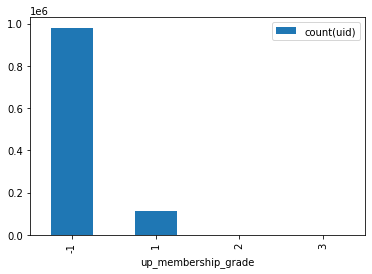

CTR


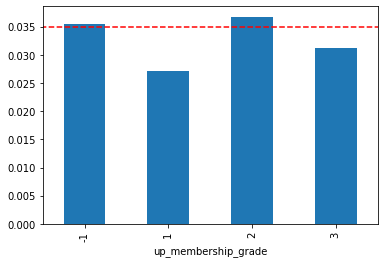

distributions of click or not


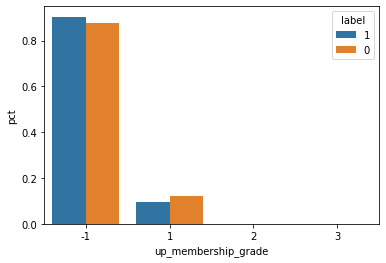



ANALYZE membership_life_duration


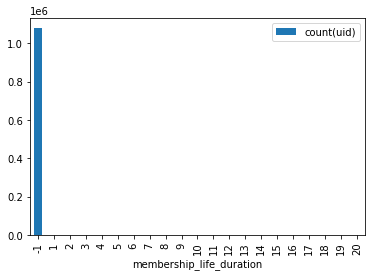

CTR


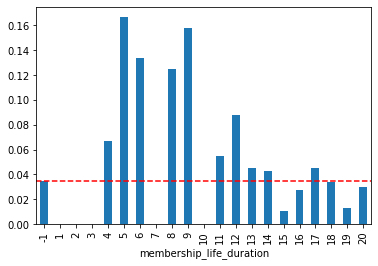

distributions of click or not


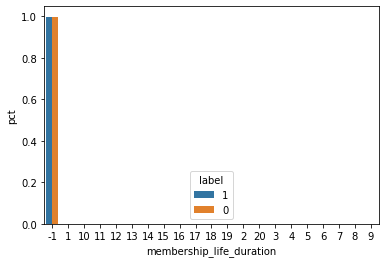



ANALYZE consume_purchase


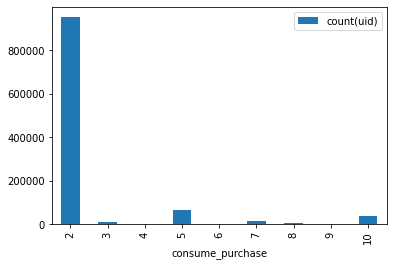

CTR


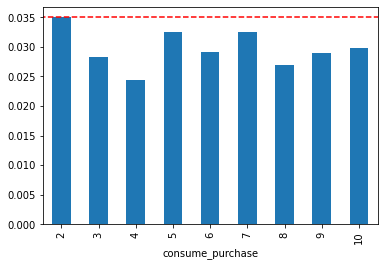

distributions of click or not


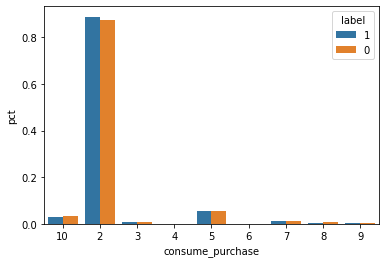



ANALYZE communication_avgonline_30d


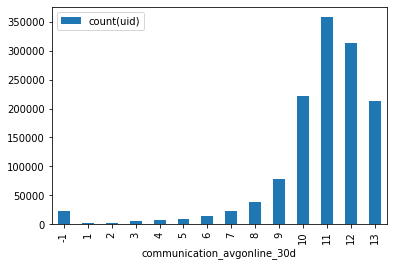

CTR


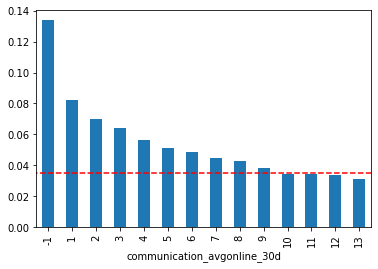

distributions of click or not


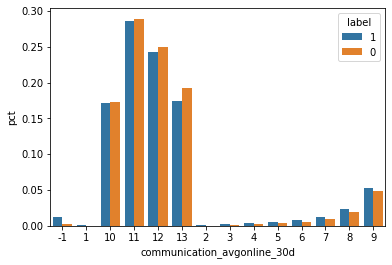

In [23]:
for feature in user_features:
    print(f"ANALYZE {feature}")
    eda.cat_analysis(raw_df,feature,"uid")
    eda.click_not_click_distrubitions(raw_df,feature)
    print("")
    print("="*20)
    print("")

## communication_onlinerate

In [24]:
raw_df.select(F.split(raw_df.communication_onlinerate,"^")).show()

+--------------------------------------+
|split(communication_onlinerate, ^, -1)|
+--------------------------------------+
|                  [0^1^2^3^4^5^6^7^...|
|                  [3^4^5^6^7^8^9^10...|
|                  [0^1^2^3^4^5^6^7^...|
|                  [5^6^7^8^9^10^11^...|
|                  [2^3^4^5^6^7^8^9^...|
|                  [6^7^8^9^10^11^12...|
|                  [0^1^2^3^4^5^6^7^...|
|                  [14^15^16^17^18^1...|
|                  [1^2^3^4^5^6^7^8^...|
|                  [6^7^8^9^10^11^12...|
|                  [6^7^8^9^10^11^12...|
|                            [21^22^23]|
|                  [2^3^4^5^6^7^8^9^...|
|                  [6^7^8^9^10^11^12...|
|                  [4^5^6^7^8^9^10^1...|
|                  [7^8^9^10^11^12^1...|
|                  [6^7^8^9^10^11^12...|
|                  [6^7^8^9^10^11^12...|
|                  [4^5^6^7^8^9^10^1...|
|                  [6^7^8^9^10^11^12...|
+--------------------------------------+
only showing top

So weird that it didn't split on "^", I have to try another way

In [25]:
# parse out only start and end time
raw_df = raw_df.withColumn("start_communication_onlinerate",raw_df.communication_onlinerate.substr(1,2))
raw_df = raw_df.withColumn("start_communication_onlinerate",F.regexp_extract(raw_df.start_communication_onlinerate,r'(\d+)',1))
raw_df = raw_df.withColumn("last_communication_onlinerate",raw_df.communication_onlinerate.substr(-2,2))
raw_df = raw_df.withColumn("last_communication_onlinerate",F.regexp_extract(raw_df.last_communication_onlinerate,r'(\d+)',1))

raw_df.select("start_communication_onlinerate","last_communication_onlinerate").show()

+------------------------------+-----------------------------+
|start_communication_onlinerate|last_communication_onlinerate|
+------------------------------+-----------------------------+
|                             0|                           23|
|                             3|                           23|
|                             0|                           23|
|                             5|                           23|
|                             2|                           23|
|                             6|                           23|
|                             0|                           23|
|                            14|                           23|
|                             1|                           23|
|                             6|                           23|
|                             6|                           23|
|                            21|                           23|
|                             2|                       

In [26]:
# make ending at 0 convert to 24
raw_df = raw_df.withColumn("last_communication_onlinerate"\
                           ,F.when(raw_df.last_communication_onlinerate == 0, 24)\
                           .otherwise(raw_df.last_communication_onlinerate))

In [27]:
# calculate the online duration in that day
raw_df = raw_df.withColumn("duration_communication_onlinerate"\
                  ,raw_df.last_communication_onlinerate-raw_df.start_communication_onlinerate)
raw_df = raw_df.withColumn("duration_communication_onlinerate",raw_df["duration_communication_onlinerate"].cast("integer").cast("string"))

ANALYZE start_communication_onlinerate


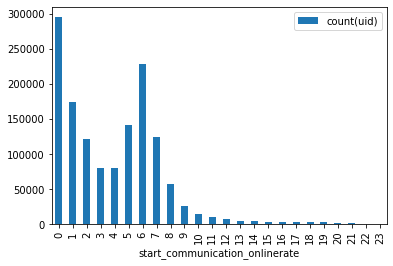

CTR


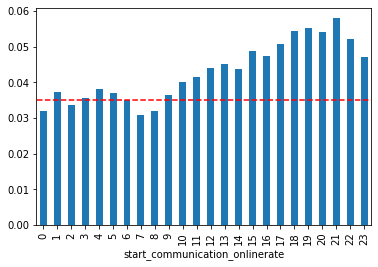

distributions of click or not


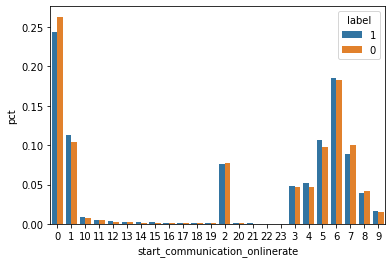



ANALYZE last_communication_onlinerate


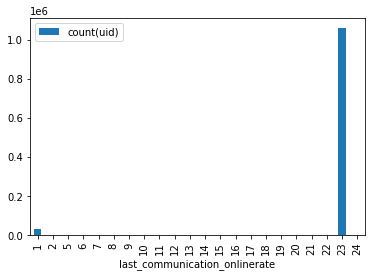

CTR


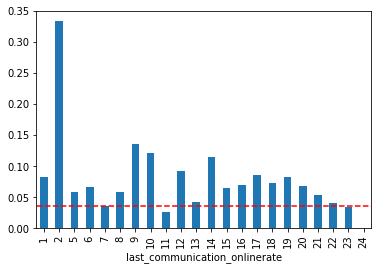

distributions of click or not


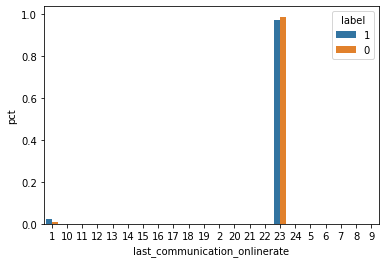



ANALYZE duration_communication_onlinerate


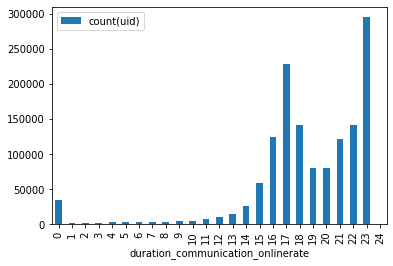

CTR


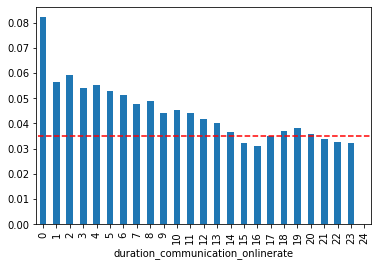

distributions of click or not


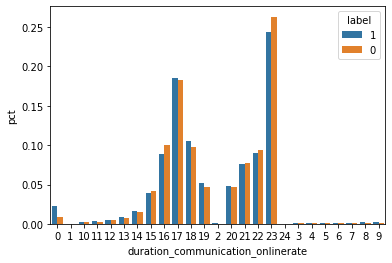

In [28]:
for feature in ["start_communication_onlinerate","last_communication_onlinerate","duration_communication_onlinerate"]:
    print(f"ANALYZE {feature}")
    eda.cat_analysis(raw_df,feature,"uid")
    eda.click_not_click_distrubitions(raw_df,feature)
    print("")
    print("="*20)
    print("")

# Ads

Can't tell the difference between task_id and adv_id, however it seems like most ad features are belong to task_id, gonna use task_id as prime identifier of ads.

In [29]:
ads_features = ["creat_type_cd",
                "adv_prim_id",
                "dev_id",
                "inter_type_cd",
                "slot_id",
                "indu_name"]

CTR distribution by task_id
count    4329.000000
mean        0.025977
std         0.046705
min         0.000000
25%         0.011905
50%         0.019476
75%         0.029167
max         1.000000
Name: task_id_ctr, dtype: float64


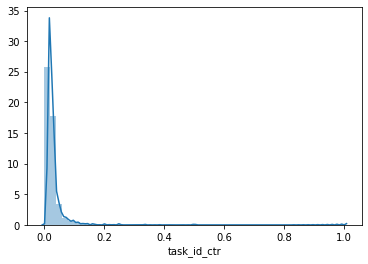

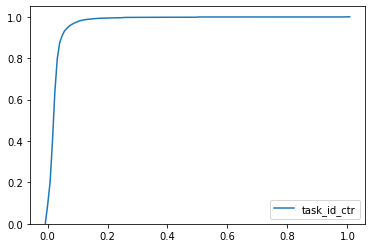

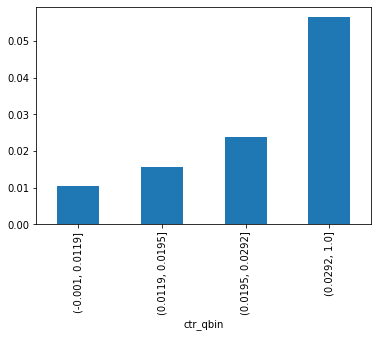

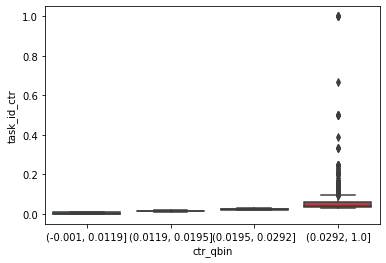

In [30]:
high_ctr_task_ids, low_ctr_task_ids = eda.id_analysis(raw_df,"task_id")

ANALYZE creat_type_cd


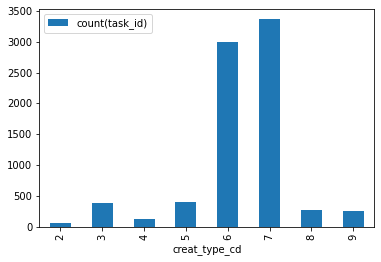

CTR


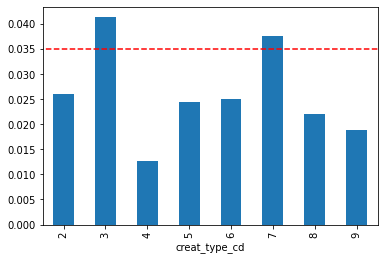

distributions of click or not


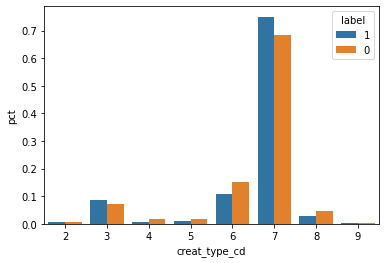



ANALYZE adv_prim_id


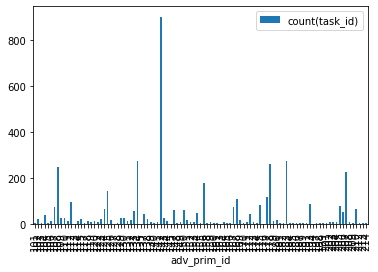

CTR


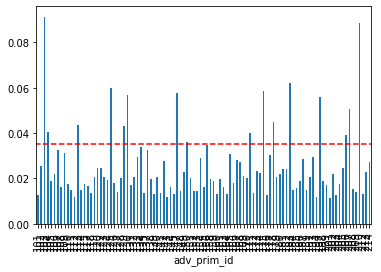

distributions of click or not


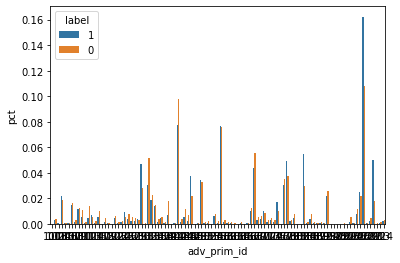



ANALYZE dev_id


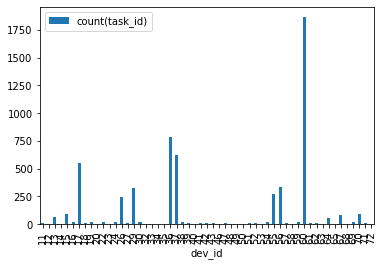

CTR


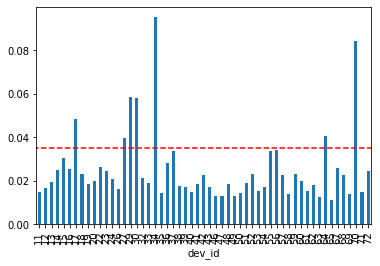

distributions of click or not


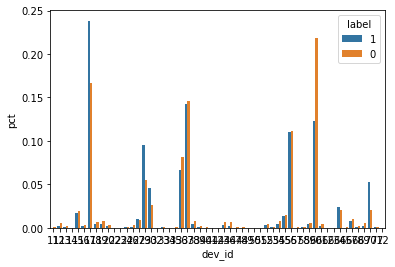



ANALYZE inter_type_cd


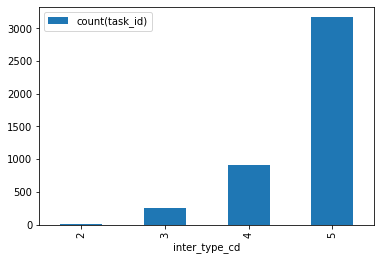

CTR


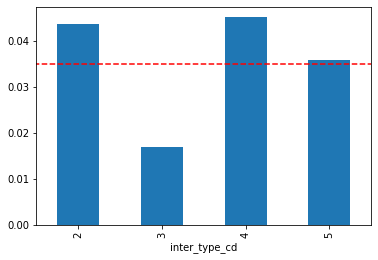

distributions of click or not


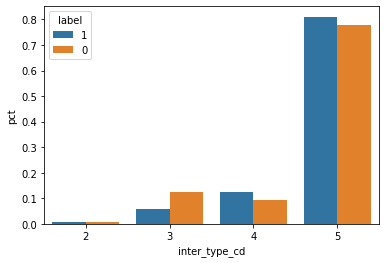



ANALYZE slot_id


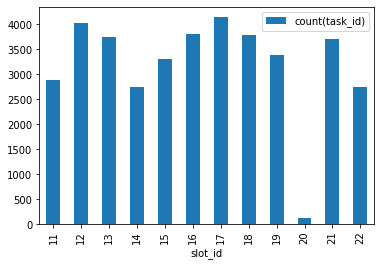

CTR


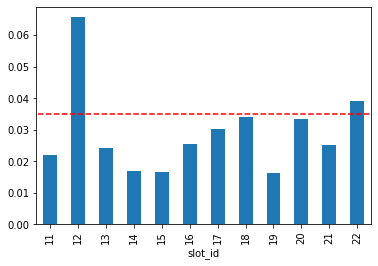

distributions of click or not


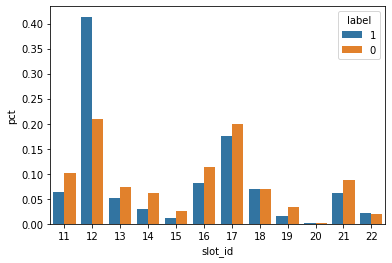



ANALYZE indu_name


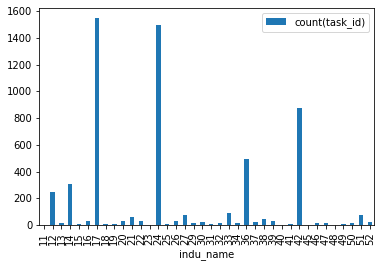

CTR


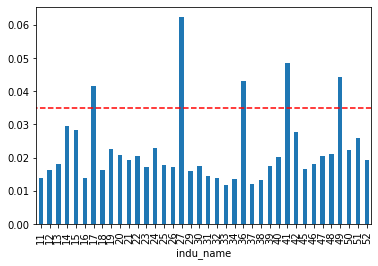

distributions of click or not


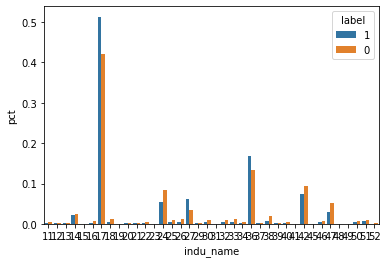

In [31]:
for feature in ads_features:
    print(f"ANALYZE {feature}")
    eda.cat_analysis(raw_df,feature,"task_id")
    eda.click_not_click_distrubitions(raw_df,feature)
    print("")
    print("="*20)
    print("")

# Apps

In [32]:
app_features = ["tags",
                "app_first_class",
                "app_second_class",
                "his_app_size",
                "his_on_shelf_time",
                "app_score"]

CTR distribution by spread_app_id
count    70.000000
mean      0.024271
std       0.015070
min       0.000000
25%       0.015687
50%       0.019712
75%       0.027392
max       0.091297
Name: spread_app_id_ctr, dtype: float64


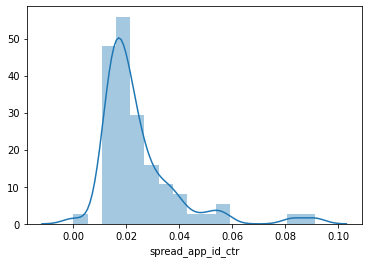

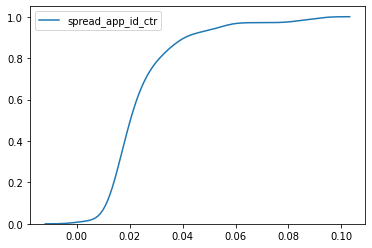

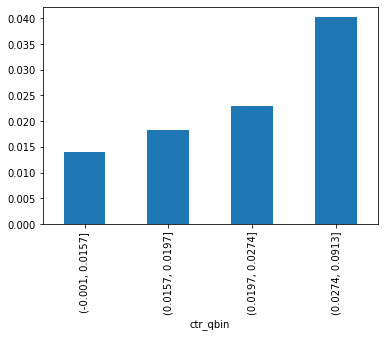

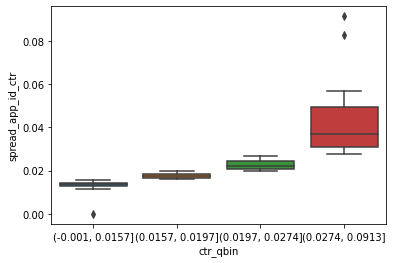

In [33]:
high_ctr_app_ids, low_ctr_app_ids = eda.id_analysis(raw_df,"spread_app_id")

ANALYZE tags


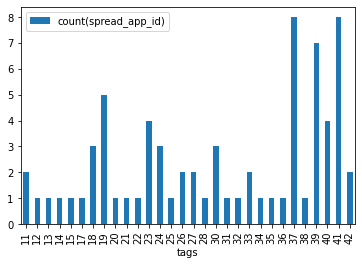

CTR


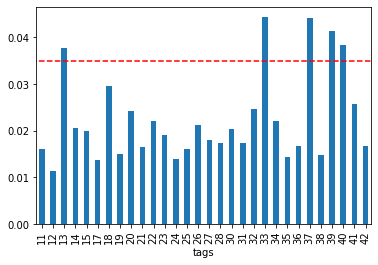

distributions of click or not


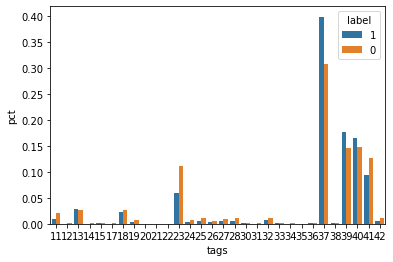



ANALYZE app_first_class


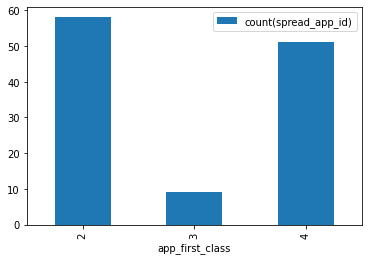

CTR


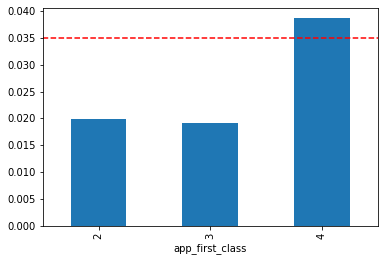

distributions of click or not


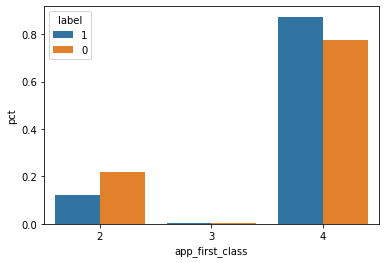



ANALYZE app_second_class


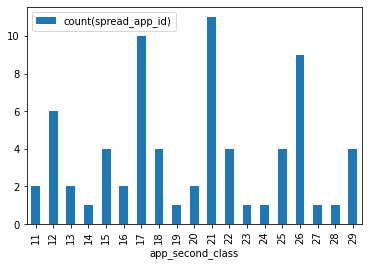

CTR


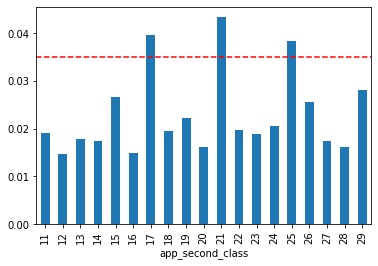

distributions of click or not


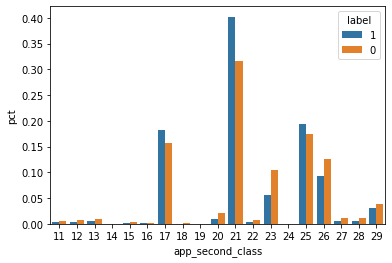



ANALYZE his_app_size


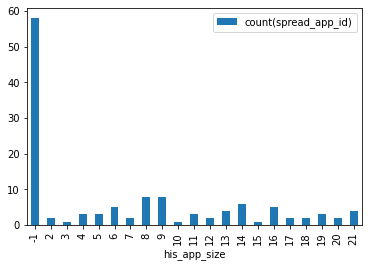

CTR


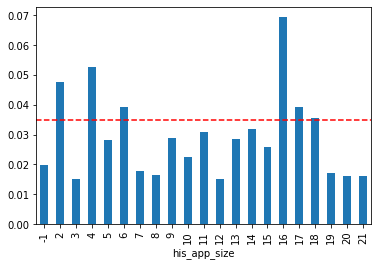

distributions of click or not


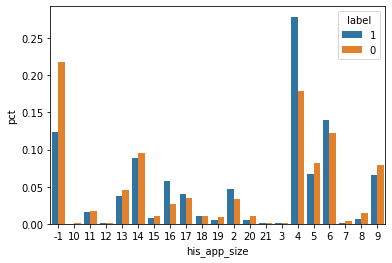



ANALYZE his_on_shelf_time


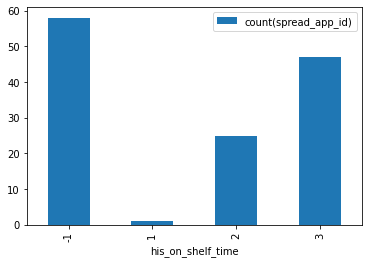

CTR


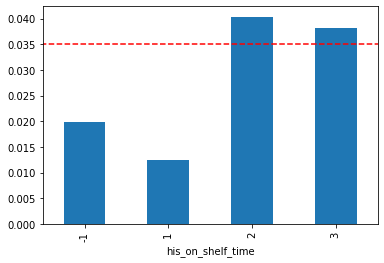

distributions of click or not


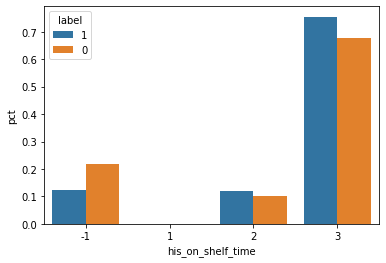



ANALYZE app_score


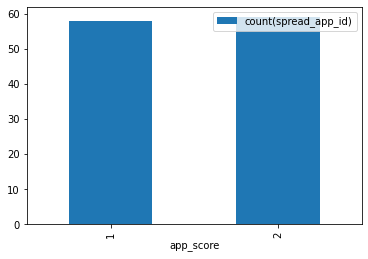

CTR


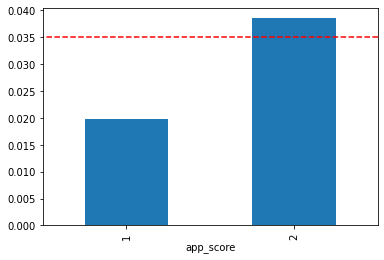

distributions of click or not


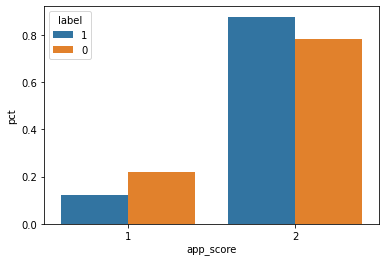

In [34]:
for feature in app_features:
    print(f"ANALYZE {feature}")
    eda.cat_analysis(raw_df,feature,"spread_app_id")
    eda.click_not_click_distrubitions(raw_df,feature)
    print("")
    print("="*20)
    print("")

# Device

In [35]:
device_features = ["device_size",
                   "emui_dev",
                   "list_time",
                   "device_price"]

CTR distribution by device_name
count    91.000000
mean      0.044774
std       0.024143
min       0.000000
25%       0.028903
50%       0.041027
75%       0.050949
max       0.200000
Name: device_name_ctr, dtype: float64


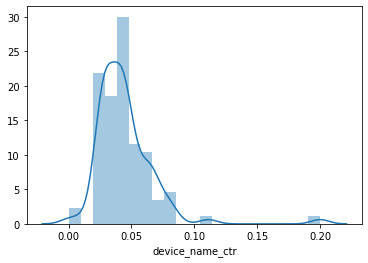

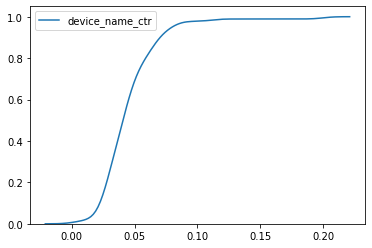

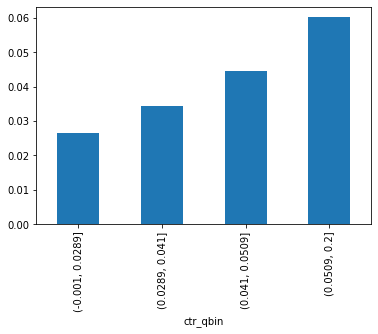

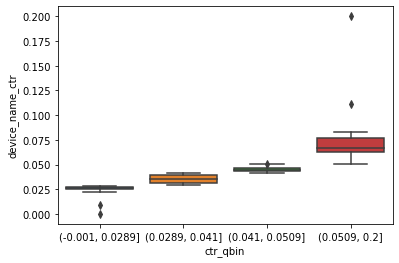

In [36]:
high_ctr_device_ids, low_ctr_device_ids = eda.id_analysis(raw_df,"device_name")

ANALYZE device_size


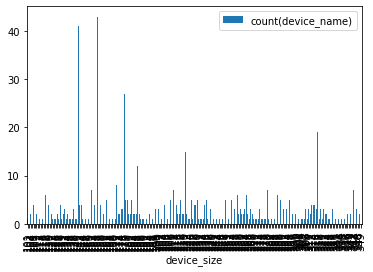

CTR


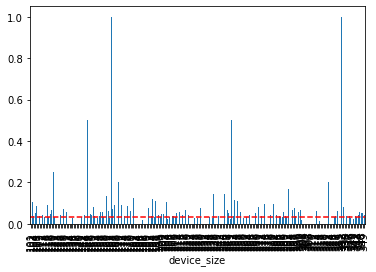

distributions of click or not


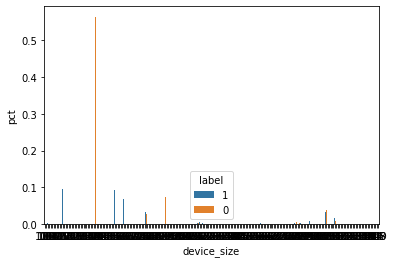



ANALYZE emui_dev


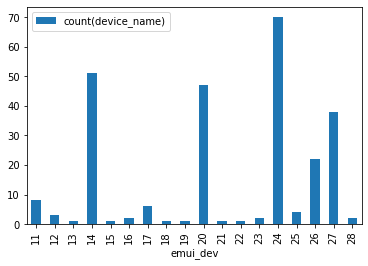

CTR


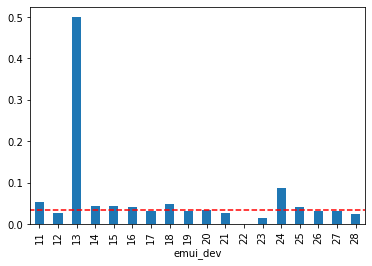

distributions of click or not


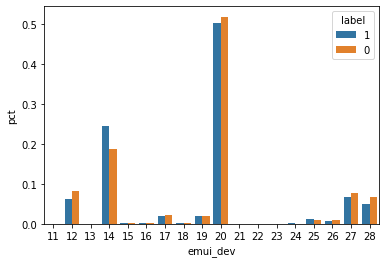



ANALYZE list_time


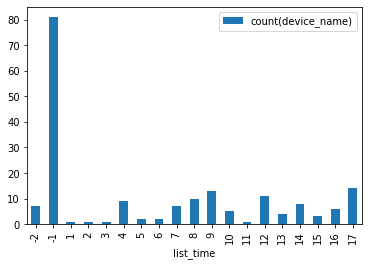

CTR


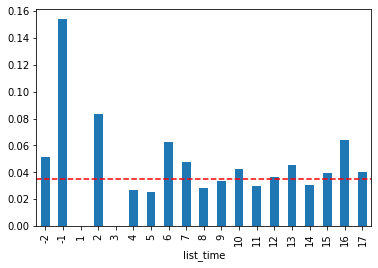

distributions of click or not


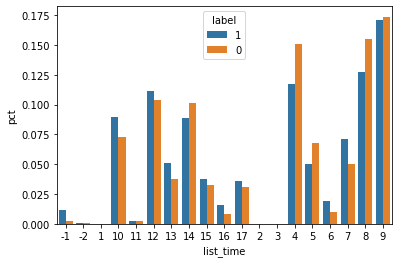



ANALYZE device_price


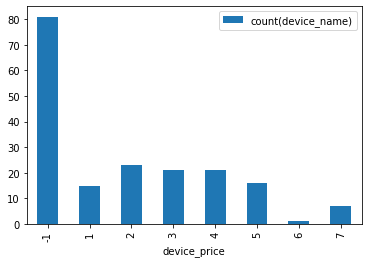

CTR


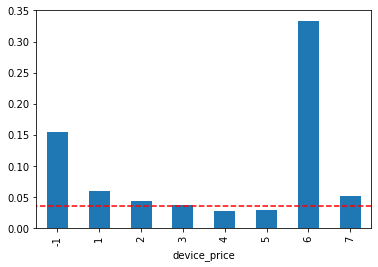

distributions of click or not


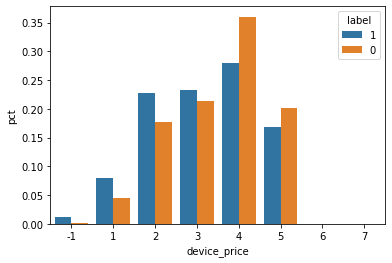

In [37]:
for feature in device_features:
    print(f"ANALYZE {feature}")
    eda.cat_analysis(raw_df,feature,"device_name")
    eda.click_not_click_distrubitions(raw_df,feature)
    print("")
    print("="*20)
    print("")

# Environment

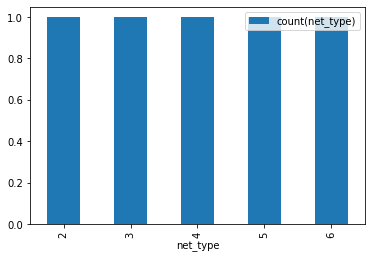

CTR


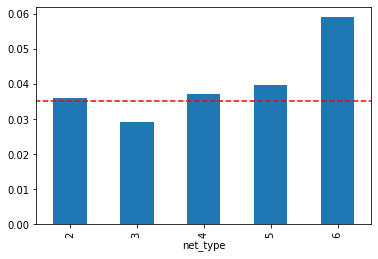

In [38]:
eda.cat_analysis(raw_df,"net_type","net_type")

distributions of click or not


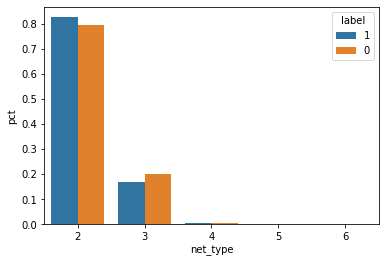

In [39]:
eda.click_not_click_distrubitions(raw_df,"net_type")

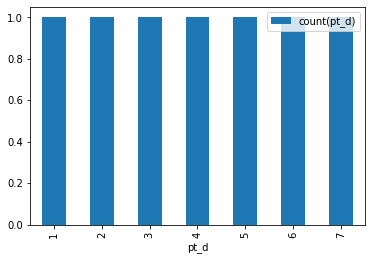

CTR


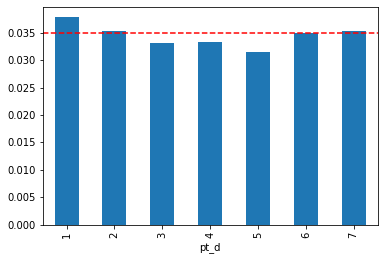

In [40]:
eda.cat_analysis(raw_df,"pt_d","pt_d")

distributions of click or not


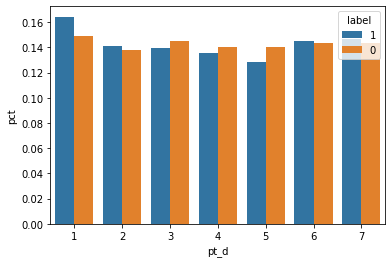

In [41]:
eda.click_not_click_distrubitions(raw_df,"pt_d")

## EDA summary
1. **users:**
    - **uid**:According to basis stats, distribution and cdf, 25% of users has CTR above 0.2. This is way larger than 0.03. Therefore I define for users, CTR above 0.2 is hige CTR. In next step anlaysises, I'll compare feature distriubtion of high CTR group and low CTR group to find out any significat different.
    
    - **age**: people who didn't report their age tend to have higher CTR. **This might be a good new feature.** Although the age distributions of two CTR groups are slightly different from each other, they distribute approximatly even across age 4 to age 7. Not really helpful for creating new feature.
    
    - **city**:didn't analyze this because too many unique cities.
    
        - **city_rank**: users from level 2 city have higher CTR.**a good new feature.**
        
        - **residence**: province 11 and 22 have high CTR.**a good new feature.**
        
    - **career**: there is no significant hight ctr nor diffent distribution. Won't be a good indicator if treating it as a single feature. Will see if this can help in clustering.
    
    - **gender**: gender 3 has higher CTR.
    
    - **up_life_duration**: Although 1 to 10 have higher CTR, compare with distribution plots, these groups don't account to much data in the total dataset. But what is interesting is that high ctr group has more -1 and low ctr group has more 20. **a good new feature.**
    
    - **up_membership_grade**: there is no significant hight ctr nor diffent distribution. Won't be a good indicator if treating it as a single feature. Won't be a good indicator in clustering since distributions are similar.
    
    - **membership_life_duration**: This is too imbalance. Almost every users belong to -1 group. This makes CTR analysis unreliable because one click in groups other than -1 ca make a huge impact on CTR. This is not a good indicator even in clustering.
    - **consume_purchase**: won't be using it. same reason as membership_life_duration
    
    - **communication_avgonline_30d**: most users stay active 10 ~ 13 hrs daily. But non-registered users have higher CTR. **a good indicator**
    
    - **communication_onlinerate**
        - **start_communication_onlinerate**: the later the user start being active, the higher the CTR.
        
        - **last_communication_onlinerate**: if end at 2 am seems it has high CTR.
        
        - **duration_communication_onlinerate**: the shorter the time users being active, the higher the CTR.
        
2. **ads**
    - **task_id**: if view from ads aspect, CTR is low across all ads. According to box plot, each quartile group don't different from each other too much. 
    - **adv_id**: not sure what is this.
    
    - **creat_type_cd**: 3 and 7 have higher CTR than other group.4 has significant lower CTR. high CTR apps has more 7.
    
    - **adv_prim_id**: too many category need a closer look.
    
    - **dev_id**: dev 34 and 70 have signficant higher CTR than other groups. 17, 29, 30 have higher CTR than the rest. hight CTR ads have more 17 while low CTR ads have more 60.
    
    - **inter_typ_cd**: Nothing too significant to tell the difference among each group.
    
    - **slot_id**: group 12 has highest CTR, high CTR group also has more group 12. **good indicator**
    
    - **indu_name**: 27 has the highest CTR while 17, 36,41 and 49 have the second best. high CTR group accouts more in 17 and 36 too.
    
3. **apps**
    - **spread_app_id**: apps' CTR distribution seems perform little better than ads ctr.
    
    - **tags**: 13, 33, 37, 39, 40 have higher CTR. The high low distribution gave the most significant difference so far.
    
    - **app_first_class**: high ctr group has more 4 and low ctr group has more 2
    
    - **app_second_class**: high low distributions have very different layout too.
    
    - **his_app_size**: app size 16 has highest CTR. distribution is significant different too.
    
    - **his_on_shelf_time**: dist plot shows a differnce bewtween high and low groups
    
    - **app_score**: although it has only two groups, the distributions are significant different.
    
4. **device**
    - **device_name**
    
    - **device_size**: need a closer look
    
    - **emui_dev**: 13 has a high ctr that can't ignore
    
    - **list_time**: -1 has very high ctr
    
    - **device_price**: price 6 has a significat high CTR. And they have different distributions.
    
6. **behavior/event**
    - **net_type**: net_type 6 has a better CTR
    
    - **pt_d**: all records are distributed evenly across 7 days. if 1 represent Monday and 7 represnts Sunday, it kind of make sense that people clik ads less during wed to friday

## Two way analysis

In [42]:
raw_df.limit(1).toPandas().columns

Index(['label', 'uid', 'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id',
       'dev_id', 'inter_type_cd', 'slot_id', 'spread_app_id', 'tags',
       'app_first_class', 'app_second_class', 'age', 'city', 'city_rank',
       'device_name', 'device_size', 'career', 'gender', 'net_type',
       'residence', 'his_app_size', 'his_on_shelf_time', 'app_score',
       'emui_dev', 'list_time', 'device_price', 'up_life_duration',
       'up_membership_grade', 'membership_life_duration', 'consume_purchase',
       'communication_onlinerate', 'communication_avgonline_30d', 'indu_name',
       'pt_d', 'label_int', 'start_communication_onlinerate',
       'last_communication_onlinerate', 'duration_communication_onlinerate'],
      dtype='object')

In [43]:
user_features = ["age",                 
                 #city,
                 "city_rank",
                 "residence",
                 "career",
                 "gender",
                 "up_life_duration",
                 "up_membership_grade",
                 "membership_life_duration",
                 "consume_purchase",
                 "duration_communication_onlinerate",
                 "communication_avgonline_30d"
                ]
ads_features = ["creat_type_cd",
                "adv_prim_id",
                "dev_id",
                "inter_type_cd",
                "slot_id",
                "indu_name"]
app_features = ["tags",
                "app_first_class",
                "app_second_class",
                "his_app_size",
                "his_on_shelf_time",
                "app_score"]
device_features = ["device_size",
                   "emui_dev",
                   "list_time",
                   "device_price"]
event_features = ["net_type",
                  "pt_d"]

In [44]:
selected_features = user_features + ads_features + app_features \
                    + device_features + event_features

In [45]:
from scipy.stats import chi2_contingency
for col in selected_features:
    print(f" chi-square test for {col} and label")
    df = raw_df.select(col, "label").groupBy("label", col).count().toPandas()
    df = pd.merge(df, df.groupby("label").sum(), on='label')
    two_way_df = pd.pivot_table(df, values='count_x', index='label', columns=col).fillna(0)
    chi2, p, dof, expect =  chi2_contingency(two_way_df)
    print(f"p-value: {p}")
    print(f"can't reject H0, {col} is independent from label" if p > 0.05 else f"reject H0, {col} is dependent from label")
    print("")
    print("="*50)
    print("")

 chi-square test for age and label
p-value: 0.0
reject H0, age is dependent from label


 chi-square test for city_rank and label
p-value: 0.0
reject H0, city_rank is dependent from label


 chi-square test for residence and label
p-value: 0.0
reject H0, residence is dependent from label


 chi-square test for career and label
p-value: 0.0
reject H0, career is dependent from label


 chi-square test for gender and label
p-value: 0.0
reject H0, gender is dependent from label


 chi-square test for up_life_duration and label
p-value: 0.0
reject H0, up_life_duration is dependent from label


 chi-square test for up_membership_grade and label
p-value: 0.0
reject H0, up_membership_grade is dependent from label


 chi-square test for membership_life_duration and label
p-value: 9.185398308365572e-07
reject H0, membership_life_duration is dependent from label


 chi-square test for consume_purchase and label
p-value: 0.0
reject H0, consume_purchase is dependent from label


 chi-square test fo

p-value < 0.05 means two variables are not independent.

In [46]:
# bucket categories into 'is this accounts more in click group?'
transform_map = {}
for col in selected_features:
    df = raw_df.select(col, "label").groupBy("label", col).count().toPandas()
    df = pd.merge(df, df.groupby("label").sum(), on='label')
    df['pct'] = df['count_x'] / df['count_y']
    transform_map[col] = (df[df.label == '1'].set_index(col).pct - df[df.label == '0'].set_index(col).pct > 0).to_dict()

In [47]:
transform_map

{'age': {'-1': True,
  '1': True,
  '2': True,
  '3': False,
  '4': False,
  '5': False,
  '6': False,
  '7': True},
 'city_rank': {'2': True, '3': True, '4': False, '5': False},
 'residence': {'11': True,
  '12': False,
  '13': True,
  '14': True,
  '15': False,
  '16': True,
  '17': True,
  '18': True,
  '19': True,
  '20': False,
  '21': True,
  '22': True,
  '23': False,
  '24': True,
  '25': True,
  '26': False,
  '27': True,
  '28': False,
  '29': True,
  '30': True,
  '31': False,
  '32': False,
  '33': True,
  '34': False,
  '35': True,
  '36': True,
  '37': True,
  '38': True,
  '39': True,
  '40': True,
  '41': True,
  '42': True,
  '43': True,
  '44': True,
  '45': True,
  '46': False},
 'career': {'10': True,
  '2': False,
  '3': False,
  '4': False,
  '5': True,
  '6': True,
  '7': False,
  '8': False,
  '9': True},
 'gender': {'2': False, '3': True, '4': False},
 'up_life_duration': {'-1': True,
  '1': True,
  '10': True,
  '11': True,
  '12': True,
  '13': True,
  '14': 